# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Saini Nur Setiawan]
- **Email:** [saininur123@gmail.com]
- **ID Dicoding:** [saini_nur]

## Menentukan Pertanyaan Bisnis

1. Apakah pada hari kerja atau akhir pekan/hari libur terdapat perbedaan jumlah sepeda yang disewa?
2. Musim apa yang memiliki tingkat penyewaan paling tinggi?
3. Bagaimana tren penyewaan setiap tahun?
4. Bagaimana karakteristik `registered` user dan `casual` user?

## Import Semua Packages/Library yang Digunakan

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sns.set_theme(style='darkgrid')

## Data Wrangling

### Gathering Data

In [251]:
hour = pd.read_csv(r'C:\SANS\knowledge\DICODING\Bike-sharing-dataset\hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [252]:
hour.shape

(17379, 17)

**Insight:**
- hour dataset memiliki 17379 baris dan 17 kolom.


### Assessing Data

In [253]:
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<Axes: >

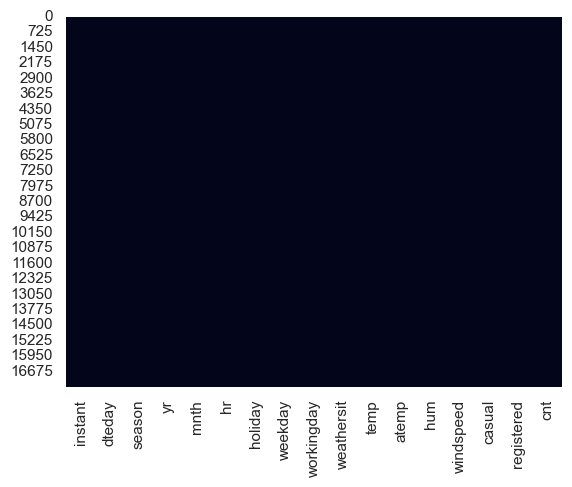

In [254]:
sns.heatmap(hour.isnull(), cbar=False)

In [255]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [256]:
listItem = []

for col in hour.columns :
    listItem.append( [col, hour[col].nunique(), hour[col].unique()])

hourTable = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
hourTable

,Column Name,Number of Unique,Unique Sample
0,instant,17379,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,dteday,731,"[2011-01-01, 2011-01-02, 2011-01-03, 2011-01-0..."
2,season,4,"[1, 2, 3, 4]"
3,yr,2,"[0, 1]"
4,mnth,12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
5,hr,24,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
6,holiday,2,"[0, 1]"
7,weekday,7,"[6, 0, 1, 2, 3, 4, 5]"
8,workingday,2,"[0, 1]"
9,weathersit,4,"[1, 2, 3, 4]"


**Insight:**
- Tidak ditemukan adanya null values pada dataset.
- Juga tidak ditemukan adanya duplicate values dalam dataset
- Dataset memiliki 4 kolom dengan format float64, 12 kolom dengan format int64, dan 1 kolom dengan format object.
- Kolom dteday seharusnya memiliki format datetime bukan object, sehingga perlu dilakukan perubahan format data.

### Cleaning Data

In [257]:
# Merubah format tipe data

hour['dteday'] = pd.to_datetime(hour['dteday'])
print(hour['dteday'].dtype)

datetime64[ns]


In [258]:
season = {1 : 'springer', 2 : 'summer', 3 : 'fall', 4 : 'winter'}
hour['season'] = hour['season'].map(season)

In [259]:
hour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Handling outliers

<Axes: xlabel='cnt'>

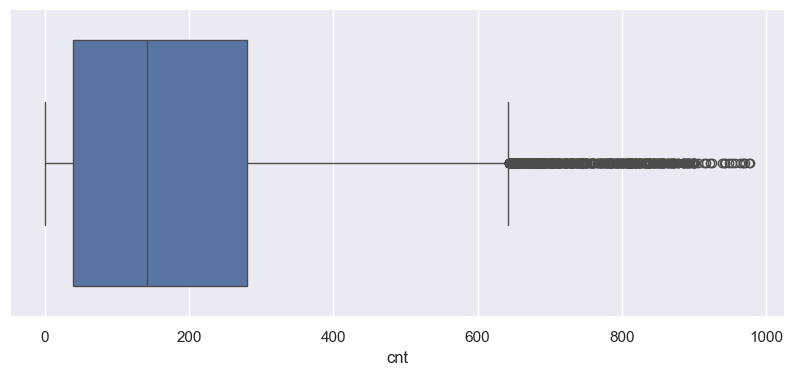

In [260]:
plt.figure(figsize=(10,4))
sns.boxplot(data=hour, x='cnt')

In [261]:
from scipy.stats import iqr

# Cek Outliers
Q3 = hour['cnt'].quantile(.75)
cnt_iqr= iqr(hour['cnt'])
UB = Q3 + 1.5 * cnt_iqr

count_outliers = hour[hour['cnt'] > UB]
count_outliers.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5536,5537,2011-08-23,fall,0,8,14,0,2,1,1,0.72,0.6515,0.30,0.0896,149,502,651
10358,10359,2012-03-12,springer,1,3,17,0,1,1,2,0.62,0.6212,0.38,0.4179,87,557,644
10359,10360,2012-03-12,springer,1,3,18,0,1,1,2,0.60,0.6212,0.43,0.1940,89,623,712
10382,10383,2012-03-13,springer,1,3,17,0,2,1,1,0.70,0.6364,0.37,0.1045,62,614,676
10383,10384,2012-03-13,springer,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734


In [262]:
listItem = []

for col in count_outliers.columns :
    listItem.append( [col, count_outliers[col].nunique(), count_outliers[col].unique()])

dayTable = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)

<Axes: xlabel='yr', ylabel='cnt'>

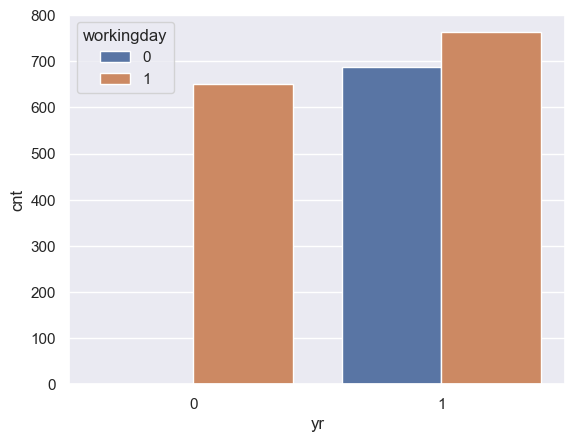

In [263]:
sns.barplot(data=count_outliers, x='yr', y='cnt', hue='workingday', errorbar=None)

In [264]:
pctg_outliers = (len(count_outliers['cnt'])/len(hour['cnt']))*100
print(f'Total outliers percentage: {pctg_outliers:.2f}%')

Total outliers percentage: 2.91%


In [265]:
# drop outliers
hour.drop(hour[hour['cnt'] > UB].index, inplace=True)
hour.shape

(16874, 17)

**Insight:**
- Outliers dicek dengan metode IQR.
- Ditemukan adanya outliers/anomali pada colom `cnt`. 
- Data outliers/anomali sebesar 2.91% dari total data, sehingga dilakukan penghapusan data outliers/anomali tersebut.


### Explore Data

In [266]:
sesaonality_analysis = hour.groupby(by=['season', 'mnth']).agg({
  'cnt' : 'mean',
  'casual' : 'mean',
  'registered' : 'mean'
}).round(2)

sesaonality_analysis

cnt  casual  registered
season   mnth                            
fall     6     227.26   48.56      178.70
         7     212.32   51.67      160.66
         8     211.59   46.83      164.76
         9     202.85   43.60      159.25
springer 1      94.42    8.43       86.00
         2     112.87   11.16      101.71
         3     138.21   25.76      112.45
         12     82.21   12.36       69.86
summer   3     147.15   30.47      116.69
         4     170.95   39.71      131.25
         5     206.46   48.84      157.62
         6     214.39   48.88      165.51
winter   9     207.25   38.35      168.90
         10    194.33   37.32      157.01
         11    169.91   24.60      145.31
         12    167.75   15.76      151.99

**Insight:**
- Berdasarkan tabel diatas, ternyata musim selalu terjadi dalam kurun 4 bulan

In [267]:
hour[['casual', 'registered']].describe()

,casual,registered
count,16874.000000,16874.000000
mean,33.418632,139.291514
std,45.896591,126.052802
min,0.000000,0.000000
25%,4.000000,32.000000
50%,15.000000,111.000000
75%,45.000000,208.000000
max,354.000000,629.000000


In [268]:
selected = hour[['casual', 'registered']]
df_melt = selected.melt(var_name='User  Type', value_name='Count')
pie_fig = px.pie(df_melt, values='Count',
                  names='User  Type', 
                  title='Distribution of Casual and Registered Users')
pie_fig.show()

**Insight:**
- Berdasarkan rata-rata dan visualisasi, `registered` dan `casual` user memiliki perbedaan yang signifikan. `registered` user memiliki rata-rata yang lebih tinggi dengan persentase sebesar 80.7% dari total keseluruhan, dan sisanya sebesar 19.3% adalah `casual` user.

In [269]:
hourly_bike_rented = hour.groupby('hr', as_index=False)['cnt'].\
  sum().sort_values('cnt', ascending=False)

hourly_bike_rented.columns = ['hour', 'total_rented']
hourly_bike_rented.head(5)

,hour,total_rented
16,16,219529
19,19,217395
17,17,214962
18,18,209297
15,15,174172


**Insight:**
- Jumlah penyewaan terbanyak terjadi pada pukul 4 pm dan paling sedikit terjadi pukul 4 am.

In [270]:
monthly_count = hour.groupby(by=['yr','mnth'], as_index=False).agg({'cnt': sum})
year = {0: '2011', 1: '2012'}
month_name = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
  }

monthly_count['yr'] = monthly_count['yr'].map(year)
monthly_count['mnth'] = monthly_count['mnth'].map(month_name)
monthly_count.columns = ['Year', 'Month', 'Count']

monthly_count.head(5)

C:\Users\User\AppData\Local\Temp\ipykernel_38964\2354818257.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



,Year,Month,Count
0,2011,January,38189
1,2011,February,48215
2,2011,March,64045
3,2011,April,94870
4,2011,May,135821


**Insight:**
- Terdapat pola yang sama antar bulan di tiap-tiap tahun, yaitu paling banyak ketika pertengahan tahun.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah pada hari kerja atau akhir pekan/hari libur terdapat perbedaan jumlah sepeda yang disewa?

In [271]:
hourly_traffic = hour[['hr','cnt','workingday']]
hourly_traffic.columns = ['hour','count','workingday']
day_cat= {1: 'Weekday', 0: 'Weekend'}
hourly_traffic['workingday'] = hourly_traffic['workingday'].map(day_cat)


fig = px.histogram(hourly_traffic, 
             x='hour', 
             y='count', 
             color='workingday', 
             title='Hourly Traffic Count')
fig.update_layout(
  xaxis_title="Hour",
  yaxis_title=None,
)
fig.update_xaxes(tickvals=list(range(0, 25, 2)))
# Show the figure
fig.show()

C:\Users\User\AppData\Local\Temp\ipykernel_38964\1373978880.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='yr', ylabel='cnt'>

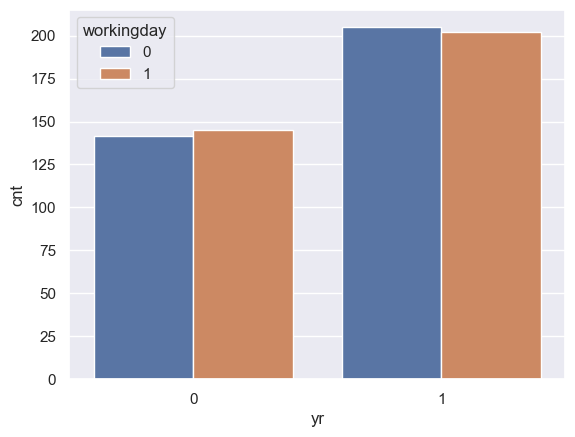

In [272]:
sns.barplot(data=hour, x='yr', y='cnt', hue='workingday', errorbar=None)

**Insight:**
* Terdapat perbedaan sifat karakter sepeda pada hari libur/akhir pekan dan hari kerja dilihat dari tiap jam.
* Pada hari kerja/weekday, lonjakan penyewaan terjadi pada pukul 06.00-08.00 dan 16.00-17.00. Hal ini dipengaruhi oleh konsumen yang beraktivitas pada pagi dan sore hari (kerja, sekolah, dsb.).
* Pada hari libur/akhir pekan(weekend), lonjakan penyewaan terjadi pada pagi hingga sore hari. Sebagian besar penyewa diperkirakan adalah wisatawan yang beraktivitas pada pagi hingga sore hari.
* Jumlah penyewaan pada hari kerja/hari biasa lebih banyak dibandingkan pada hari libur/akhir pekan/hari besar

### Pertanyaan 2: Musim apa yang memiliki tingkat penyewaan paling tinggi?

In [273]:
season_amount = hour.groupby('season', as_index=False).agg({'cnt':'sum'})
season_amount.columns = ['season','amount']

fig = px.bar(season_amount, x="season", y="amount",
             title="Number of rent by season")
fig.update_traces(marker_color='#d00000')
fig.update_layout(height = 400,
                  width = 800)
fig.show()

**Insight:**
* Jumlah sepeda yang disewakan paling banyak adalah pada musim gugur.
* Jumlah sepeda yang disewakan paling sedikit adalah pada musim semi.

### Pertanyaan 3: Bagaimana tren penyewaan sepeda setiap tahun?

In [274]:
line = px.line(data_frame=monthly_count,
                  x='Month', y='Count', color='Year',
                  title='Renter Trend Line')
line.update_layout(
  xaxis_title=None,
  yaxis_title=None,
)
line.show()

**Insight:**
* Q2 dan Q3 menjadi musim dengan jumlah penyewa tertinggi, dan Q1 menjadi musim dengan jumlah penyewa terendah. Ini menunjukkan bahwa musim panas (Q2 dan Q3) adalah waktu yang bagus untuk meningkatkan tingkat penyewaan sepeda.

### Pertanyaan 4: Bagaimana karakteristik `registered` user dan `casual` user?

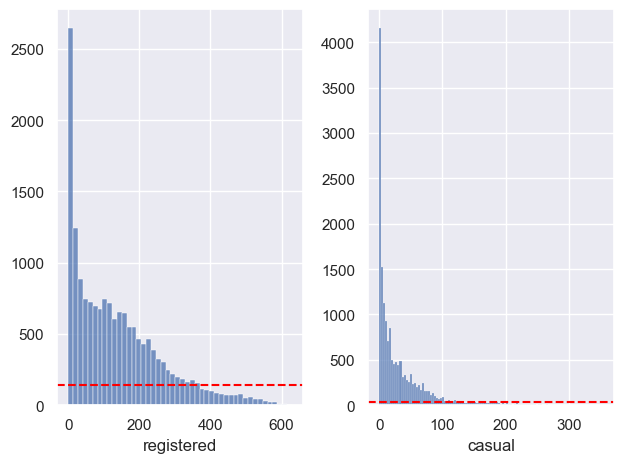

In [275]:
figure, axes = plt.subplots(1,2, figure=(24,6))
sns.histplot(hour, x='registered', ax=axes[0])
axes[0].axhline(y=hour['registered'].mean(), color='red',
                linestyle='--', label='Mean Registered Users')
axes[0].set_ylabel(None)

sns.histplot(hour, x='casual', ax=axes[1])
axes[1].axhline(y=hour['casual'].mean(), color='red',
                linestyle='--', label='Mean Casual Users')
axes[1].set_ylabel(None)
plt.tight_layout()

In [287]:
user_char = hour.groupby('workingday', as_index=False).agg({
  'registered' : 'sum',
  'casual' : 'sum'
})
day_cat= {1: 'Weekday', 0: 'Weekend'}
user_char['workingday'] = user_char['workingday'].map(day_cat)
user_fig = make_subplots(rows=1, cols=2, shared_yaxes=True)
user_fig.add_trace(
  go.Bar(x=user_char['workingday'], y=user_char['registered'], name='Registered'),1,1
)
user_fig.add_trace(
  go.Bar(x=user_char['workingday'], y=user_char['casual'], name='Casual'),1,2
)
user_fig.update_layout(height = 500,
                  width = 800)

In [282]:
user_char

,workingday,registered,casual
0,0,645834,291878
1,1,1704571,272028


**Insight:**
* `registered` dan `casual` user memiliki perilaku yang berbeda. `registered` user lebih aktif dan lebih sering menggunakan layanannya pada hari kerja (tidak pada akhir pekan maupun hari libur). Sebaliknya, `casual` user lebih aktif dan lebih sering menggunakan layanan pada hari libur.

## Conclusion

**Kesimpulan pertanyaan 1**
* Terdapat perbedaan sifat karakter sepeda pada hari libur/akhir pekan dan hari kerja dilihat dari tiap jam.

**Kesimpulan pertanyaan 2**
* Jumlah sepeda yang disewakan paling banyak adalah pada musim gugur(fall).

**Kesimpulan pertanyaan 3**
* Terdapat pertumbuhan tingkat penyewaan dari tahun 2011 ke tahun 2012. Hal itu menunjukan tren positif dalam industri penyewaan sepeda.

**Kesimpulan pertanyaan 4**
* `registered` dan `casual` user memiliki perilaku yang berbeda. `registered` user lebih aktif dan lebih sering menggunakan layanan pada hari kerja dan `casual` user lebih sering menggunakan layanan pada hari libur.


## Suggestion

1. Perusahaan harus menyediakan sepeda dalam jumlah yang tepat pada waktu yang tepat berdasarkan karakter pengguna. Misalnya:
- Pada hari kerja, perusahaan harus menyediakan lebih banyak sepeda bagi pengguna yang sedang dalam jam sibuk. Dan pada hari libur, perusahaan harus menyediakan lebih banyak sepeda bagi wisatawan dari pagi hingga sore hari.
- Perusahaan harus menyiapkan jumlah sepeda untuk memastikan ketersediaan sepeda terutama selama musim panas dan musim gugur.

2. Perusahaan harus memperlakukan pengguna yang berbeda secara berbeda.
- Untuk `registered` user, jumlahnya lebih besar daripada pengguna biasa. Perusahaan juga dapat memberikan diskon bagi `casual` user yang menyewa sepeda pada hari kerja.
- Untuk `casual` user, perusahaan harus menyediakan sepeda dengan jumlah yang sesuai. Dan dapat menghasilkan lebih banyak keuntungan dengan strategi harga yang lebih tinggi selama liburan.